--------------------------------------------------
    i     |     xi     |   xi+1     |    E_a (%) 
--------------------------------------------------
    0     |   0.0000   |  -0.2000   |    N/A    
    1     |  -0.2000   |  -0.1997   |   0.1266  
Root Approximation: -0.1997
Root Found Nearly: 0.13 %


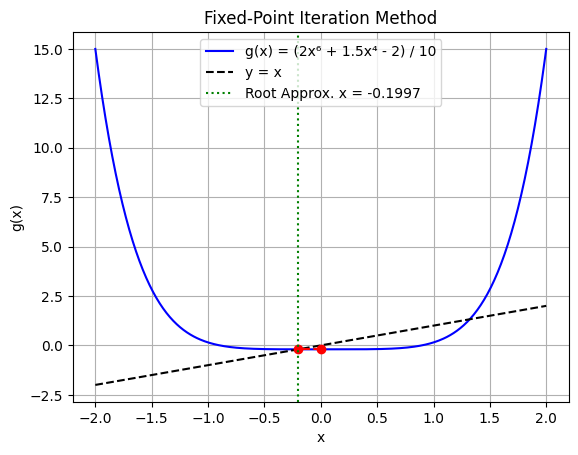

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xi = float(input("Enter xi (Initial Value): "))

def g(x):
    return (2 * x ** 6 + 1.5 * x ** 4 - 2) / 10

# Initializes the variables of the method.
xi = xi
iterations = []
tol=2.0 
max_iter=100

# Calculations.
for i in range(max_iter):
    xi_1 = g(xi)

    if i > 0:
        e_a = abs((xi_1 - xi) / xi_1) * 100
    else:
        e_a = None

    iterations.append((i, xi, xi_1, e_a))

    if e_a is not None and e_a <= tol:
        break

    xi = xi_1

# Prints the results.
print("-" * 50)
print("    i     |     xi     |   xi+1     |    E_a (%) ")
print("-" * 50)

for i, xi, xi_plus_1, e_a in iterations:
    e_a_str = f"{e_a:^10.4f}" if e_a is not None else "   N/A    "
    print(f"{i:^9} | {xi:^10.4f} | {xi_plus_1:^10.4f} | {e_a_str}")

print(f"Root Approximation: {xi_plus_1:.4f}")
print(f"Root Found Nearly: {e_a:.2f} %")

x_vals = np.linspace(-2, 2, 400)
y_vals = g(x_vals)

# Plots the method itself.
plt.plot(x_vals, y_vals, label="g(x) = (2x⁶ + 1.5x⁴ - 2) / 10", color='blue')
plt.plot(x_vals, x_vals, label="y = x", color='black', linestyle='--')

for i, xi, xi_plus_1, e_a in iterations:
    plt.plot([xi, xi_plus_1], [xi_plus_1, xi_plus_1], 'r--')  
    plt.plot([xi_plus_1, xi_plus_1], [xi_plus_1, g(xi_plus_1)], 'g--')  
    plt.plot(xi, xi_plus_1, 'ro')  

# Highlights the roots.
final_x = iterations[-1][2]
plt.axvline(final_x, color='green', linestyle=':', label=f"Root Approx. x = {final_x:.4f}")

# Adds titles, labels, legends, and window title.
plt.gcf().canvas.manager.set_window_title("Simple Fixed Method | Function Plot")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Fixed-Point Iteration Method')
plt.legend()
plt.grid()
plt.show()